Sentiment Analysis On Twitter:-Peform text analysis on tweets(can use a precollected dataset).Classify tweets as Positive,neutral or negative.
Challenges:1)Clean and preprocess tweet text(Remove stopwords,punctuation,etc.)
           2)Visualize sentiment distribution 
           3)Use a simple model like Logistic Regression or Naive Bayes

Import the neccesary liabraries for the analysis and visualizations.

In [3]:
import pandas as pd
import numpy as np
import re    #removing urls,#,@,special characters
import matplotlib.pyplot as plt    #visuaslize sentiment distribution
from textblob import TextBlob   #TextBlob provides sentiment polarity(positive,neutral,negative)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk   #text preprocessing tools
from sklearn.naive_bayes import MultinomialNB  #classifier

from nltk.corpus import stopwords   #removing words like:is,am,the,and,on
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading the dataset

In [4]:
df = pd.read_csv("twitter.csv")
df.head()

,tweet
0,Feeling grateful for the little things in life.
1,Just tried out the new smartphone and I'm blow...
2,AI is changing the world in ways we never imag...
3,Looking for new recipes to try out this weekend!
4,Can't stop listening to this new song on repeat!


#TextCleaning

In [5]:
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\s+|www\S+","",text)   #remove links
    text = re.sub(r"@\w+","",text)             #remove mentions
    text = re.sub(r"#","",text)                #remove hashtags
    text = re.sub(r"[^a-z\s]","",text)         #remove special  characters
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

Identifying Tweet Column:Tweet text can be stored under different column names in different datasets  



In [28]:
#Common tweet column names
possible_columns = ['text', 'tweet', 'tweets', 'content', 'message']
#inialize variable
tweet_column = None  #tweet_column will store the actual column name once found,
                    #None means “not found yet”
for col in possible_columns:   #Allows checking which name exists in the dataset
    if col in df.columns:      #df.columns contains all column names of the dataset
        tweet_column = col      #Saves the correct tweet column name
        break                   #break stops the loop after the first match

if tweet_column is None:
    raise ValueError("❌ No tweet/text column found in the dataset")

print(f"\nUsing '{tweet_column}' as tweet column")



Using 'tweet' as tweet column


#applying cleaning

In [7]:
df['clean_text'] = df[tweet_column].apply(clean_tweet)

Sentiment Labeling(TextBlob):Polarity > 0 → Positive
                             ,Polarity < 0 → Negative
                            ,Polarity = 0 → Neutral

In [8]:
def get_sentiment(text):
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0:
             return "positive"
        elif polarity < 0:
             return "negative"
        else:
             return "neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)

print("\nSentiment Sample:")
print(df[['clean_text', 'sentiment']].head())




Sentiment Sample:
                                clean_text sentiment
0      feeling grateful little things life  negative
1  tried new smartphone im blown away tech  positive
2    ai changing world ways never imagined   neutral
3          looking new recipes try weekend  positive
4      cant stop listening new song repeat  positive


 Visualization Sentiment Distribution

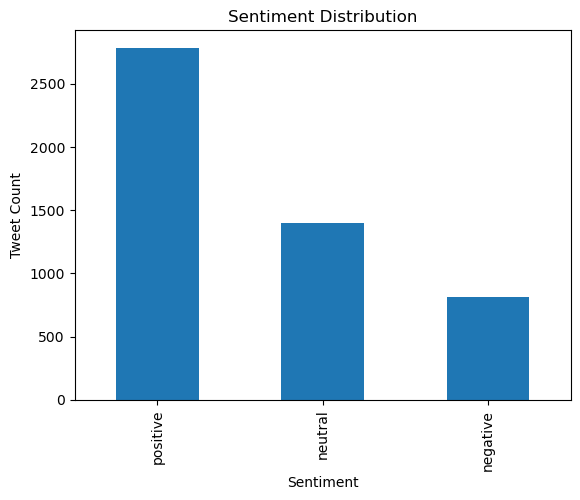

In [9]:
df['sentiment'].value_counts().plot(kind='bar',title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

TF-IDF Vectorization:1)ML models cannot understand text directly,
                    2)Used TF-IDF converts text into numerical vectors

In [10]:
X = df['clean_text']
y = df['sentiment']
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

#spliting the dataset into training(80%) and testing(20%) dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


Using Logistic Regression Model:1)Learn patterns between words and sentiment labels 2)Predict sentiment of new tweets

In [11]:
#Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy → Overall correctness

Classification Report → Precision, Recall, F1-score

Confusion Matrix → Correct vs incorrect predictions

In [12]:
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       176
     neutral       1.00      1.00      1.00       275
    positive       1.00      1.00      1.00       549

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
 [[176   0   0]
 [  0 275   0]
 [  0   0 549]]
Confusion Matrix:
 [[176   0   0]
 [  0 275   0]
 [  0   0 549]]


Creates Naive Bayes classifier

In [13]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


1.Predicts sentiment for unseen tweets,
2.Used for performance comparison

In [14]:
y_pred_nb = nb_model.predict(X_test)


1)Measures accuracy
2)Shows precision, recall, and F1-score
3)Displays correct vs incorrect predictions

In [16]:
print("\nNaive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))



Naive Bayes Accuracy: 1.0

Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00       176
     neutral       1.00      1.00      1.00       275
    positive       1.00      1.00      1.00       549

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Naive Bayes Confusion Matrix:
 [[176   0   0]
 [  0 275   0]
 [  0   0 549]]


ACCURACY COMPARISON BAR CHART:-Shows which model has higher accuracy,Easy visual comparison,Useful for conclusions

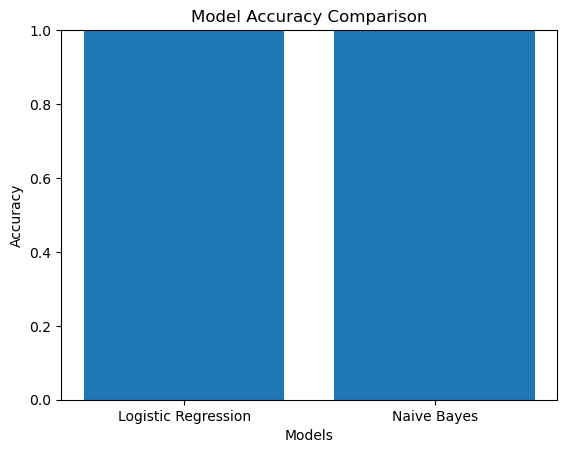

In [19]:
# Accuracy values (replace with your actual output values)
lr_accuracy = accuracy_score(y_test, y_pred)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

models = ['Logistic Regression', 'Naive Bayes']
accuracies = [lr_accuracy, nb_accuracy]

plt.figure()   #create a new blank figure
plt.bar(models, accuracies)   #draw bar chart
plt.xlabel("Models") #labels x-axis models
plt.ylabel("Accuracy") #labels y axois models
plt.title("Model Accuracy Comparison") #title 
plt.ylim(0, 1) #set y axis range from 0 to 1
plt.show() #display bar chart


CONFUSION MATRIX VISUALIZATION (LOGISTIC REGRESSION)

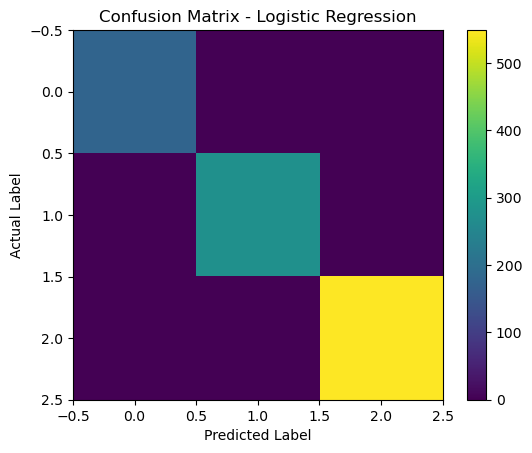

In [20]:
cm_lr = confusion_matrix(y_test, y_pred) #Creates confusion matrix for Logistic Regression

plt.figure()
plt.imshow(cm_lr)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()
plt.show()


CONFUSION MATRIX VISUALIZATION (NAIVE BAYES)

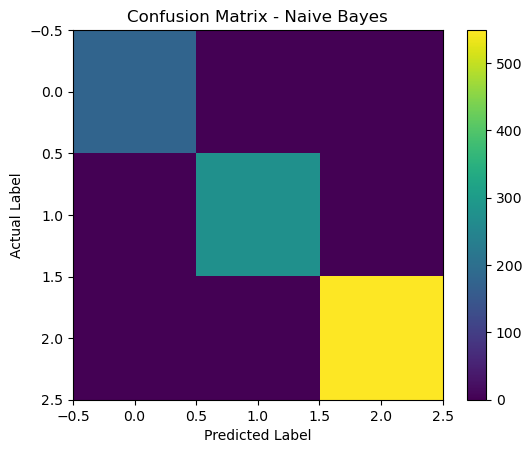

In [21]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure()
plt.imshow(cm_nb)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()
plt.show()


SENTIMENT DISTRIBUTION (OPTIONAL BUT GOOD)

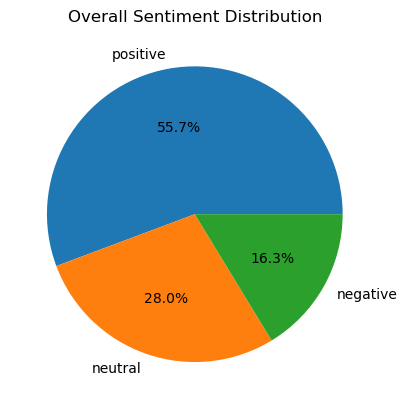

In [30]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution")
plt.ylabel("")
plt.show()


Two machine learning models, Naive Bayes and Logistic Regression, were trained and evaluated for sentiment classification. Model performance was measured using accuracy and confusion matrices. The sentiment distribution of the dataset was also visualized using a pie chart.

Based on the results, Logistic Regression achieved higher accuracy than Naive Bayes and performed better with TF-IDF features. Therefore, Logistic Regression was selected as the final model for this tweet sentiment analysis task.